# Submit the residuals to the PDFitc

In [1]:
%run -i startup2.py

## Export the residuals to a file

Load the data.

In [2]:
info = pd.read_csv("data_info.csv")
info

,sample,iq,sq,fq,gr,fgr0,fgr1,fgr2,csv0,csv1,...,csv_two_phase,fgr_two_phase,csv_two_phase_sine_wave,fgr_two_phase_sine_wave,csv_one_phase_logsp,fgr_one_phase_logsp,csv_two_phase_logsp,fgr_two_phase_logsp,final_csv,final_fgr
0,JBNP31,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,res/JBNP31_fix_xyz_0.fgr,res/JBNP31_free_xyz_0.fgr,res/JBNP31_free_xyz_add_delta_0.fgr,res/JBNP31_fix_xyz_0.csv,res/JBNP31_free_xyz_0.csv,...,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr,NaN,NaN,res/JBNP31_one_phase_logsp_0.csv,res/JBNP31_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr
1,JBNP32L,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,res/JBNP32L_fix_xyz_0.fgr,res/JBNP32L_free_xyz_2.fgr,res/JBNP32L_free_xyz_add_delta_1.fgr,res/JBNP32L_fix_xyz_0.csv,res/JBNP32L_free_xyz_2.csv,...,NaN,NaN,res/JBNP32L_two_phase_sine_wave_0.csv,res/JBNP32L_two_phase_sine_wave_0.fgr,res/JBNP32L_one_phase_logsp_0.csv,res/JBNP32L_one_phase_logsp_0.fgr,res/JBNP32L_two_phase_logsp_0.csv,res/JBNP32L_two_phase_logsp_0.fgr,res/JBNP32L_add_sine_wave_0.csv,res/JBNP32L_add_sine_wave_0.fgr
2,JBNP32,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,res/JBNP32_fix_xyz_0.fgr,res/JBNP32_free_xyz_0.fgr,res/JBNP32_free_xyz_add_delta_0.fgr,res/JBNP32_fix_xyz_0.csv,res/JBNP32_free_xyz_0.csv,...,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr,NaN,NaN,res/JBNP32_one_phase_logsp_0.csv,res/JBNP32_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr
3,JBNP33L,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,res/JBNP33L_fix_xyz_0.fgr,res/JBNP33L_free_xyz_0.fgr,res/JBNP33L_free_xyz_add_delta_0.fgr,res/JBNP33L_fix_xyz_0.csv,res/JBNP33L_free_xyz_0.csv,...,NaN,NaN,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr,res/JBNP33L_one_phase_logsp_1.csv,res/JBNP33L_one_phase_logsp_1.fgr,res/JBNP33L_two_phase_logsp_0.csv,res/JBNP33L_two_phase_logsp_0.fgr,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr
4,JBNP33,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,res/JBNP33_fix_xyz_0.fgr,res/JBNP33_free_xyz_0.fgr,res/JBNP33_free_xyz_add_delta_0.fgr,res/JBNP33_fix_xyz_0.csv,res/JBNP33_free_xyz_0.csv,...,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr,NaN,NaN,res/JBNP33_one_phase_logsp_0.csv,res/JBNP33_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr


In [25]:
del info

In [3]:
# data profile
profile = io.load_profile(info.loc[3]["gr"], {"qdamp":0.0313, "qbroad": 0.0131})

Export the residuals after the bronze and ligand is subtracted.

In [4]:
model = create_model_with_ligand()
model.set_profile(profile)
model.load("results2/JBNP33L.txt")
model.set_xrange(1.6, 50.0, 0.01)

In [26]:
del profile

In [10]:
model.set_value(A_scale=0.)
model.eval()

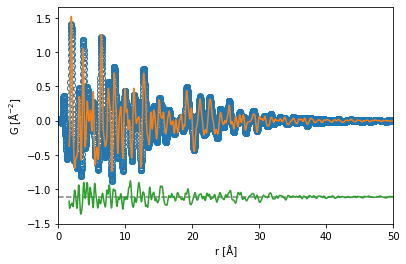

In [12]:
model.plot()

In [22]:
del model

In [14]:
fits = model.export_fits()
fits

<xarray.Dataset>
Dimensions:  (x: 4841, xobs: 10001)
Coordinates:
  * x        (x) float64 1.6 1.61 1.62 1.63 1.64 ... 49.97 49.98 49.99 50.0
  * xobs     (xobs) float64 0.0 0.01 0.02 0.03 0.04 ... 99.97 99.98 99.99 100.0
Data variables:
    y        (x) float64 -0.4303 -0.437 -0.4399 ... 0.0009551 0.001426 0.001998
    ycalc    (x) float64 -0.3709 -0.3544 -0.3366 ... -0.0008615 -0.0009855
    yobs     (xobs) float64 0.0 -0.004579 -0.008917 ... 0.00147 0.001737

In [20]:
fits["ydiff"] = fits["y"] - fits["ycalc"]
fits["ydiff"].attrs = fits["ycalc"].attrs
residuals = np.stack([fits["x"].values, fits["ydiff"].values])

In [23]:
del fits

In [21]:
np.savetxt("summary/JBNP33L_x_ydiff.gr", residuals.T)

In [24]:
del residuals

## Upload to PDFitc

https://pdfitc.org/

## The found structures from PDFitc

The PDFitc thinks the Anatase is the optimal candidate. It is correct.

In [29]:
results = pd.read_csv("summary/JBNP33L_x_ydiff_TiO2_after_subtract_bronze_and_sine_wave.csv", index_col=0)

In [39]:
sel_results = results[["rw", "space_group", "db", "db_id"]]
sel_results.head(15)

,rw,space_group,db,db_id
0,0.572104,I4_1/amd,COD,7206075
1,0.573994,I4_1/amd,COD,1526931
2,0.577880,I4_1/amd,COD,9008213
3,0.578014,I4_1/amd,COD,9015929
4,0.578555,I4_1/amd,COD,9008214
5,0.600092,I4_1/amd,COD,9008215
6,0.600798,I4_1/amd,COD,9008216
7,0.603931,I4_1/amd,COD,9009086
8,0.643562,I4_1/amd,MPD,mp-390
9,0.647970,I4_1/amd,COD,1010942


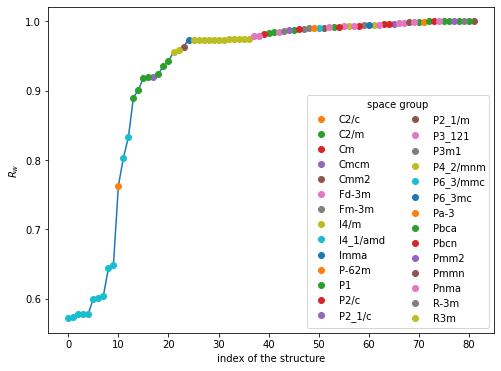

In [53]:
def plot_in_groups(data, by, ax, *, ncol):
    grouped = data.groupby(by)
    ax.plot(data.index, data["rw"], '-')
    for name, group in grouped:
        ax.plot(group.index, group["rw"], "o", label=name)
    ax.legend(ncol=ncol, title="space group")
    ax.set_ylabel("$R_w$")
    ax.set_xlabel("index of the structure")
    return

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_in_groups(sel_results, "space_group", ax, ncol=2)